In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import colors

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(rc={
    "axes.facecolor": "#e0f4f1",
    "figure.facecolor": "#f0faf8"
})
palette = ["#5d737e", "#64b6ac", "#c0fdfb", "#3a506b", "#1c2541", "#0b132b"]

sns.set_palette(palette)
cmap = colors.ListedColormap(palette)

In [8]:
data = pd.read_csv("/kaggle/input/drug-consumption-classification/drug_consumption.csv")

In [9]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [10]:
summary = data.describe(include='all')
print("Dataset Summary:\n", summary)


Dataset Summary:
                  ID         Age       Gender    Education      Country  \
count   1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
unique          NaN         NaN          NaN          NaN          NaN   
top             NaN         NaN          NaN          NaN          NaN   
freq            NaN         NaN          NaN          NaN          NaN   
mean     945.294960     0.03461    -0.000256    -0.003806     0.355542   
std      545.167641     0.87836     0.482588     0.950078     0.700335   
min        1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%      474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%      946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%     1417.000000     0.49788     0.482460     0.454680     0.960820   
max     1888.000000     2.59171     0.482460     1.984370     0.960820   

          Ethnicity       Nscore       Escore       Oscore       Ascore  ...  \
count   1885.

In [11]:
# Count of unique values for each column
unique_counts = data.nunique()
print("\nUnique Counts:\n", unique_counts)


Unique Counts:
 ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Mushrooms       7
Nicotine        7
Semer           5
VSA             7
dtype: int64


In [12]:
data.duplicated().count()

1885

In [13]:
data.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [14]:

# Handle Outliers - using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data_clean = data[(z_scores < 3).all(axis=1)]
print(f"\nOriginal Data Size: {data.shape[0]}, Data size after outlier removal: {data_clean.shape[0]}")



Original Data Size: 1885, Data size after outlier removal: 1819


In [17]:
personality_traits = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']


correlation_matrix = data_clean[personality_traits].corr()

print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
           Nscore    Escore    Oscore    Ascore    Cscore
Nscore  1.000000 -0.419725  0.015369 -0.215059 -0.376558
Escore -0.419725  1.000000  0.245982  0.150101  0.294882
Oscore  0.015369  0.245982  1.000000  0.031522 -0.068425
Ascore -0.215059  0.150101  0.031522  1.000000  0.242965
Cscore -0.376558  0.294882 -0.068425  0.242965  1.000000


Text(0, 0.5, 'Extraversion Score')

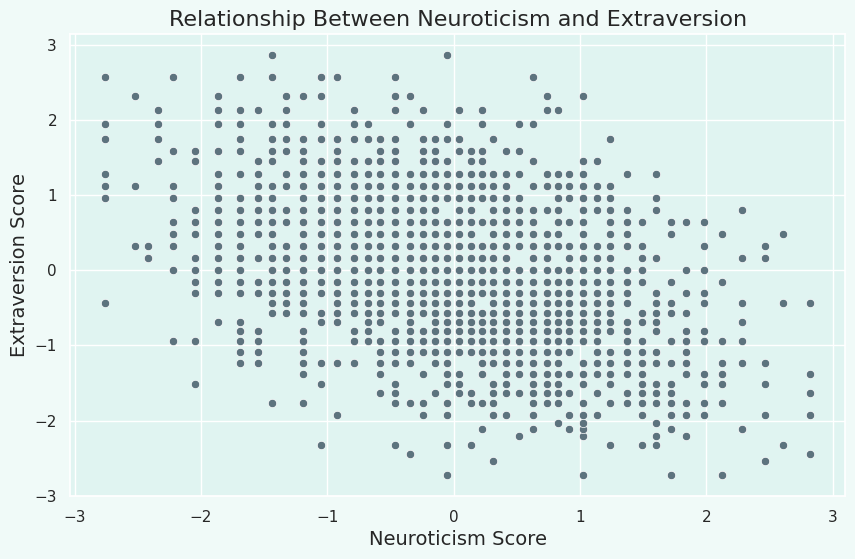

In [18]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nscore', y='Escore', data=data_clean)
plt.title('Relationship Between Neuroticism and Extraversion', fontsize=16)
plt.xlabel('Neuroticism Score', fontsize=14)
plt.ylabel('Extraversion Score', fontsize=14)



Text(0, 0.5, 'Count')

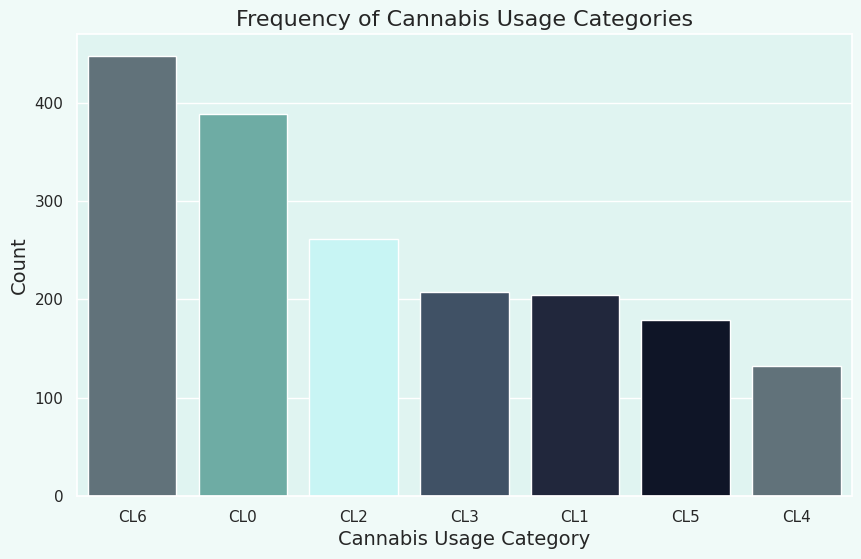

In [19]:

plt.figure(figsize=(10, 6))
cannabis_usage_counts = data_clean['Cannabis'].value_counts()
sns.barplot(x=cannabis_usage_counts.index, y=cannabis_usage_counts.values , palette=palette)
plt.title('Frequency of Cannabis Usage Categories', fontsize=16)
plt.xlabel('Cannabis Usage Category', fontsize=14)
plt.ylabel('Count', fontsize=14)




Text(0, 0.5, 'Neuroticism Score')

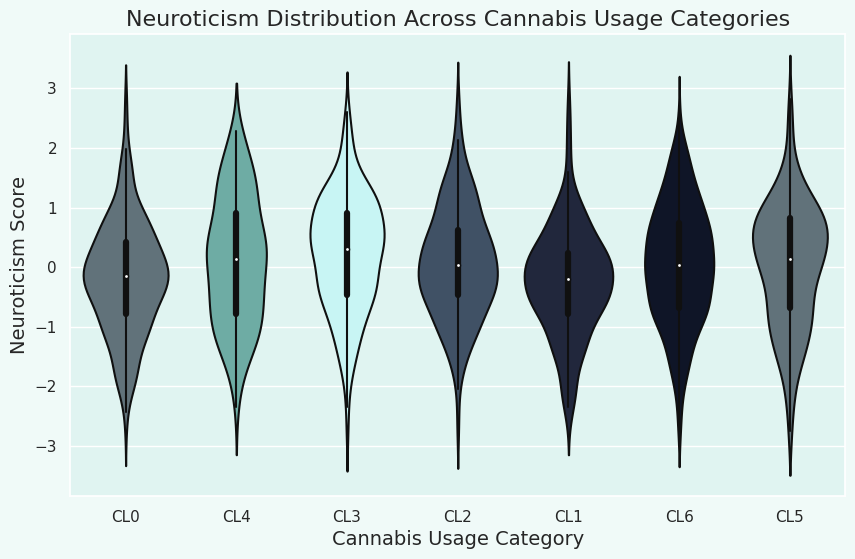

In [20]:

plt.figure(figsize=(10, 6))
sns.violinplot(x=data_clean['Cannabis'], y=data_clean['Nscore'], palette=palette)
plt.title('Neuroticism Distribution Across Cannabis Usage Categories', fontsize=16)
plt.xlabel('Cannabis Usage Category', fontsize=14)
plt.ylabel('Neuroticism Score', fontsize=14)



Text(0.5, 1.0, 'Correlation Between Personality Traits')

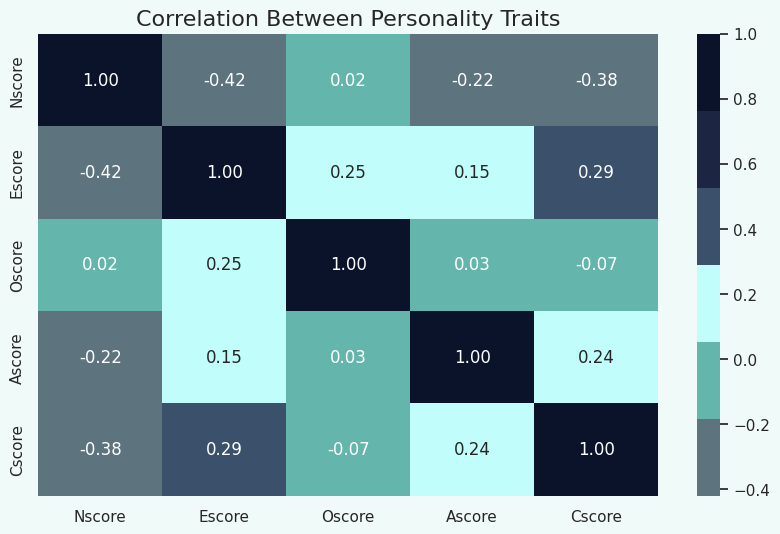

In [21]:
plt.figure(figsize=(10, 6))
corr = data_clean[personality_traits].corr()
sns.heatmap(corr, annot=True, fmt=".2f",cmap=cmap)
plt.title('Correlation Between Personality Traits', fontsize=16)


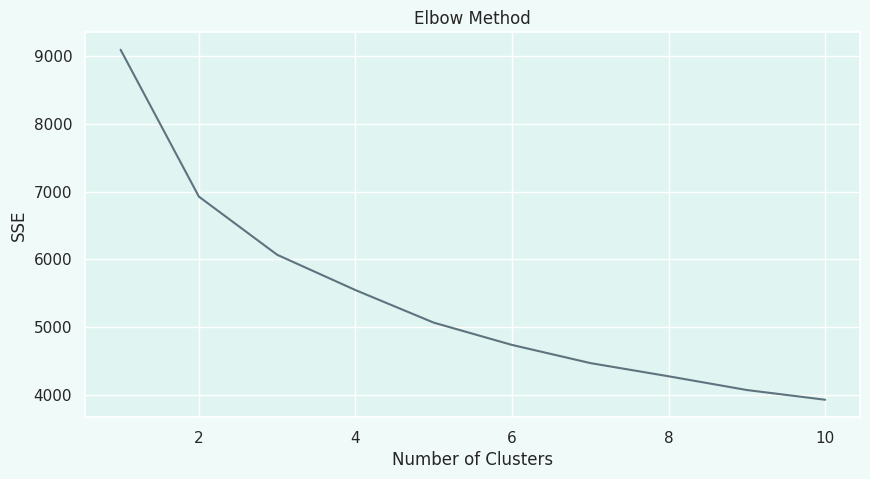

In [22]:
clustering_features = data_clean[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42 ,  n_init="auto")
    kmeans.fit(scaled_features)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

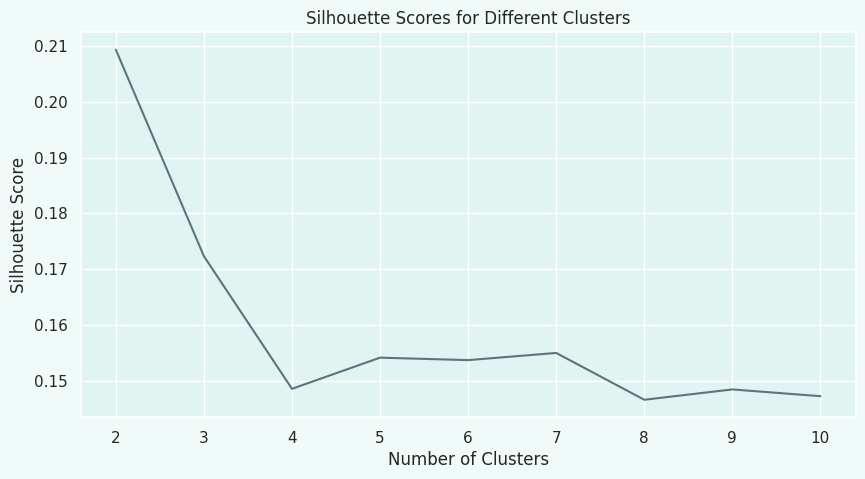

In [23]:
# Silhouette Scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42 , n_init="auto")
    cluster_labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Clusters")
plt.show()

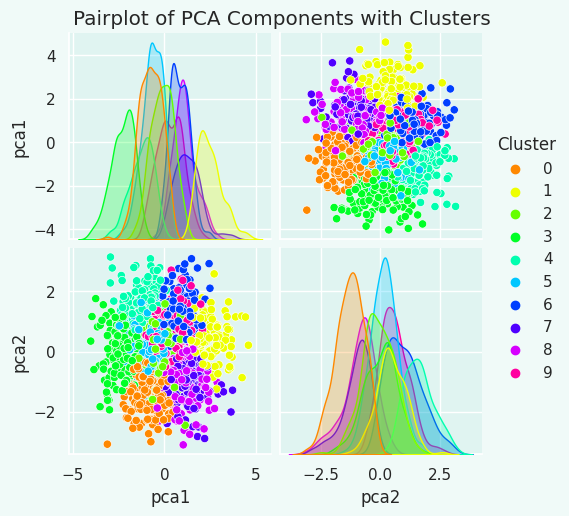

In [28]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
data_clean = data_clean.copy()

# Rest of your code for PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

data_clean['pca1'] = pca_result[:, 0]
data_clean['pca2'] = pca_result[:, 1]

clusters = kmeans.fit_predict(scaled_features)
data_clean['Cluster'] = clusters


expanded_palette = sns.color_palette("hsv", len(np.unique(data_clean['Cluster'])))

# Pairplot with clusters
sns.pairplot(data_clean, vars=['pca1', 'pca2'], hue="Cluster", palette=expanded_palette)
plt.suptitle('Pairplot of PCA Components with Clusters', y=1.02)
plt.show()



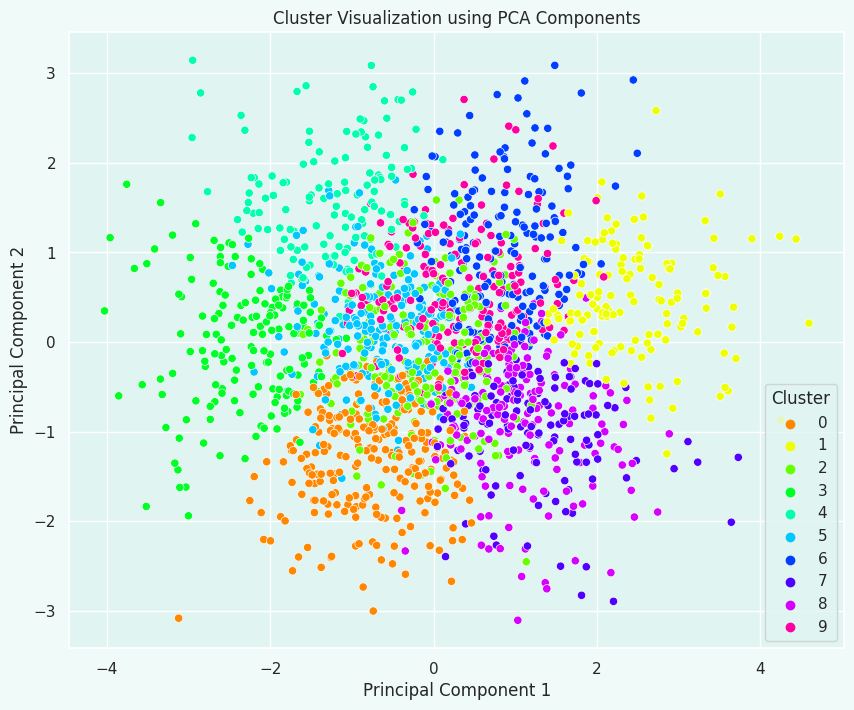

In [30]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=data_clean, palette=expanded_palette, legend='full')
plt.title('Cluster Visualization using PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Mean Squared Error: 0.8186809728661819
R-Squared: 0.16774094011488494


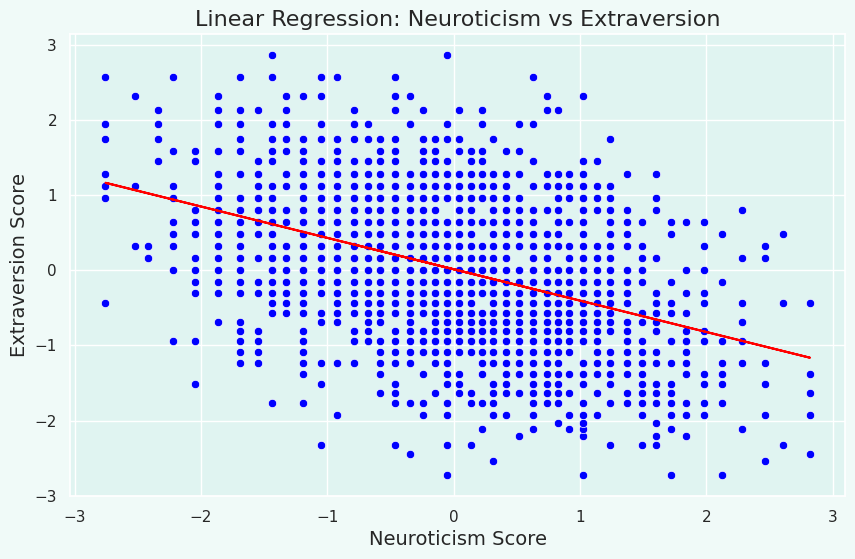

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = data_clean[['Nscore']]  
y = data_clean['Escore']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nscore', y='Escore', data=data_clean, color='blue')
plt.plot(X_test, y_pred, color='red')  # Plotting the regression line
plt.title('Linear Regression: Neuroticism vs Extraversion', fontsize=16)
plt.xlabel('Neuroticism Score', fontsize=14)
plt.ylabel('Extraversion Score', fontsize=14)
plt.show()
